# Imports

In [4]:
import pandas as pd

# Data Collection

In [5]:
!wget https://nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com/otg_prod/media/Tech_4.0/AI_ML/CCBP_Platform_Projects/Car_Price_Prediction/train_Y_cp.csv
!wget https://nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com/otg_prod/media/Tech_4.0/AI_ML/CCBP_Platform_Projects/Car_Price_Prediction/train_X_cp.csv
!wget https://nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com/otg_prod/media/Tech_4.0/AI_ML/CCBP_Platform_Projects/Car_Price_Prediction/test_X_cp.csv

--2022-08-08 06:59:14--  https://nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com/otg_prod/media/Tech_4.0/AI_ML/CCBP_Platform_Projects/Car_Price_Prediction/train_Y_cp.csv
Resolving nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com (nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com)... 52.219.156.186
Connecting to nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com (nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com)|52.219.156.186|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 881 [text/csv]
Saving to: ‘train_Y_cp.csv’

train_Y_cp.csv      100%[===================>]     881  --.-KB/s    in 0s      

2022-08-08 06:59:15 (61.1 MB/s) - ‘train_Y_cp.csv’ saved [881/881]

--2022-08-08 06:59:15--  https://nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com/otg_prod/media/Tech_4.0/AI_ML/CCBP_Platform_Projects/Car_Price_Prediction/train_X_cp.csv
Resolving nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com (nkb-backend-otg-me

In [6]:
train_X_df = pd.read_csv('train_X_cp.csv')
train_Y_df = pd.read_csv('train_Y_cp.csv', header=None).squeeze()

test_X_df = pd.read_csv('test_X_cp.csv')

# Implementation

In [7]:
train_X_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,0,90.09,toyota,gas,std,four,hatchback,fwd,front,95.7,...,four,98,2bbl,3.19,3.03,9.0,70.0,4800.0,30,37
1,0,84.15,subaru,gas,turbo,four,wagon,4wd,front,96.9,...,four,108,mpfi,3.62,2.64,7.7,111.0,4800.0,23,23
2,1,126.72,nissan,gas,std,two,hatchback,fwd,front,94.5,...,four,97,2bbl,3.15,3.29,9.4,69.0,5200.0,31,37
3,0,77.22,honda,gas,std,four,wagon,fwd,front,96.5,...,four,92,1bbl,2.92,3.41,9.2,76.0,6000.0,30,34
4,-1,73.26,volvo,gas,std,four,wagon,rwd,front,104.3,...,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28


In [8]:
train_Y_df.head()

0     7198
1    11694
2     7799
3     7295
4    13415
Name: 0, dtype: int64

In [9]:
train_X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          160 non-null    int64  
 1   normalized-losses  130 non-null    float64
 2   make               160 non-null    object 
 3   fuel-type          160 non-null    object 
 4   aspiration         160 non-null    object 
 5   num-of-doors       158 non-null    object 
 6   body-style         160 non-null    object 
 7   drive-wheels       160 non-null    object 
 8   engine-location    160 non-null    object 
 9   wheel-base         160 non-null    float64
 10  length             160 non-null    float64
 11  width              160 non-null    float64
 12  height             160 non-null    float64
 13  curb-weight        160 non-null    int64  
 14  engine-type        160 non-null    object 
 15  num-of-cylinders   160 non-null    object 
 16  engine-size        160 non

In [10]:
train_X_df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
count,160.000000,130.000000,160.000000,160.000000,160.000000,160.000000,160.00000,160.000000,156.000000,156.000000,160.000000,158.000000,158.000000,160.000000,160.000000
mean,0.825000,119.858538,98.563750,171.996412,65.124056,53.072044,2544.29375,126.943750,3.339038,3.260385,9.916375,104.234177,5131.329114,25.050000,30.656250
std,1.241575,33.925568,5.966905,12.053789,2.001085,2.428956,503.01518,42.322102,0.269400,0.324126,3.638608,38.145075,500.238293,6.491213,6.750772
min,-2.000000,64.350000,86.600000,139.689000,59.697000,47.322000,1488.00000,61.000000,2.680000,2.190000,7.000000,48.000000,4150.000000,13.000000,16.000000
25%,0.000000,93.060000,94.500000,165.503250,63.434250,51.381000,2184.75000,98.000000,3.150000,3.102500,8.600000,70.500000,4800.000000,19.000000,25.000000
50%,1.000000,113.850000,96.500000,171.369000,64.746000,53.163000,2422.50000,120.000000,3.310000,3.290000,9.000000,95.000000,5150.000000,24.500000,30.000000
75%,2.000000,148.500000,102.100000,179.734500,65.835000,54.945000,2910.50000,142.000000,3.602500,3.460000,9.400000,116.000000,5500.000000,29.250000,34.000000
max,3.000000,228.690000,120.900000,206.019000,71.280000,59.202000,4066.00000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000


In [11]:
train_X_df.head(1)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,0,90.09,toyota,gas,std,four,hatchback,fwd,front,95.7,...,four,98,2bbl,3.19,3.03,9.0,70.0,4800.0,30,37


In [12]:
non_numerical_columns = train_X_df.columns[train_X_df.dtypes == 'object']
print(non_numerical_columns)
print(len(non_numerical_columns))

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system'],
      dtype='object')
10


In [13]:
print(train_X_df[train_X_df.isna()].columns)
print(test_X_df[train_X_df.isna()].columns)

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg'],
      dtype='object')
Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg'],
      dtype='object')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

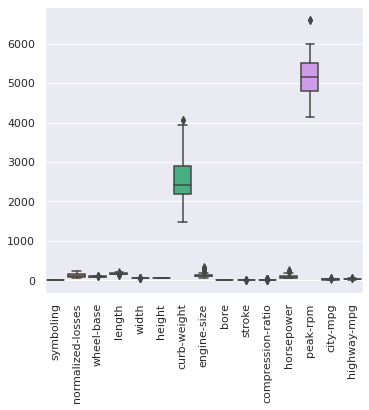

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(5.7,5.27)})
sns.boxplot(data = train_X_df)
plt.xticks(rotation=90)

In [15]:
numerical_cols = train_X_df.columns[train_X_df.dtypes != 'object']
numerical_cols

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg'],
      dtype='object')

In [16]:
train_X_df[numerical_cols].head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,0,90.09,95.7,164.637,63.756,52.272,2109,98,3.19,3.03,9.0,70.0,4800.0,30,37
1,0,84.15,96.9,171.864,64.746,54.351,2650,108,3.62,2.64,7.7,111.0,4800.0,23,23
2,1,126.72,94.5,163.944,63.162,52.767,2028,97,3.15,3.29,9.4,69.0,5200.0,31,37
3,0,77.22,96.5,155.529,63.261,57.717,2024,92,2.92,3.41,9.2,76.0,6000.0,30,34
4,-1,73.26,104.3,186.912,66.528,56.925,3034,141,3.78,3.15,9.5,114.0,5400.0,23,28


In [17]:
train_X_df['horsepower'].unique()

array([ 70., 111.,  69.,  76., 114.,  68.,  86.,  84.,  62., 110., 106.,
       134.,  92., 207., 121.,  95.,  82.,  56., 160., 116., 162.,  64.,
        85., 102., 176., 184., 120.,  72.,  48., 112.,  55., 115., 101.,
       135., 161.,  60., 152.,  73., 123.,  nan, 142., 156.,  97., 175.,
       143.,  88., 145.,  58., 100.,  52.,  94.,  78., 182., 154., 140.,
        90., 262.])

In [18]:
# dicrete data filling
from sklearn.pipeline import Pipeline 
from sklearn.impute import SimpleImputer 
discrete_cols = ['symboling','curb-weight','engine-size','city-mpg','horsepower','peak-rpm','highway-mpg']
discrete_pipeline = Pipeline(steps = [('discrete_imputer', SimpleImputer(strategy = 'median'))])

In [19]:
# continuous data filling
continuous_cols = list(set(numerical_cols) - set(discrete_cols))
continuous_pipeline = Pipeline(steps = [('continuous_imputer', SimpleImputer(strategy = 'mean'))])

In [20]:
categorical_cols = train_X_df.columns[train_X_df.dtypes == 'object']
categorical_cols

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system'],
      dtype='object')

In [21]:
train_X_df[categorical_cols].head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,toyota,gas,std,four,hatchback,fwd,front,ohc,four,2bbl
1,subaru,gas,turbo,four,wagon,4wd,front,ohcf,four,mpfi
2,nissan,gas,std,two,hatchback,fwd,front,ohc,four,2bbl
3,honda,gas,std,four,wagon,fwd,front,ohc,four,1bbl
4,volvo,gas,std,four,wagon,rwd,front,ohc,four,mpfi


In [22]:
train_X_df[categorical_cols].isna().sum()

make                0
fuel-type           0
aspiration          0
num-of-doors        2
body-style          0
drive-wheels        0
engine-location     0
engine-type         0
num-of-cylinders    0
fuel-system         0
dtype: int64

In [23]:
train_X_df['drive-wheels'] = train_X_df['drive-wheels'].replace(['4wd'],'fwd')

In [24]:
train_X_df["num-of-cylinders"].unique()

array(['four', 'six', 'five', 'eight', 'three', 'two', 'twelve'],
      dtype=object)

In [25]:
# Ordinal Data 
from sklearn.preprocessing import OrdinalEncoder
ordinal_cols = ['num-of-doors','num-of-cylinders']
ordinal_categories = [['two','four'],
                      ['two','three','four','five','six','eight','twelve']]
ordinal_pipeline = Pipeline(steps = [('ordinal_imputer', SimpleImputer(strategy = 'most_frequent')),
                                     ('ordinal_encoder', OrdinalEncoder(categories = ordinal_categories))])

In [26]:
train_X_df[categorical_cols].head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,toyota,gas,std,four,hatchback,fwd,front,ohc,four,2bbl
1,subaru,gas,turbo,four,wagon,fwd,front,ohcf,four,mpfi
2,nissan,gas,std,two,hatchback,fwd,front,ohc,four,2bbl
3,honda,gas,std,four,wagon,fwd,front,ohc,four,1bbl
4,volvo,gas,std,four,wagon,rwd,front,ohc,four,mpfi


In [27]:
# Nominal Data
from sklearn.preprocessing import OneHotEncoder
nominal_cols = list(set(categorical_cols) - set(ordinal_cols))

In [28]:
train_X_df[nominal_cols].isna().sum()

engine-location    0
make               0
drive-wheels       0
engine-type        0
body-style         0
fuel-type          0
aspiration         0
fuel-system        0
dtype: int64

In [29]:
nominal_pipeline = Pipeline(steps = [('onehot-encoder', OneHotEncoder(handle_unknown = 'ignore'))])

In [31]:
from sklearn.compose import ColumnTransformer
column_transformer = ColumnTransformer(transformers = [('discrete', discrete_pipeline, discrete_cols),
                                                       ('continuous', continuous_pipeline, continuous_cols),
                                                       ('ordinal', ordinal_pipeline, ordinal_cols),
                                                       ('nominal', nominal_pipeline, nominal_cols)],
                                       remainder = 'passthrough')

In [32]:
from sklearn.linear_model import Ridge, LinearRegression,Lasso,ElasticNet
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
pipe = Pipeline(steps = [('preprocessing',column_transformer),
                         ('scaler', StandardScaler()),
                         ('regressor', Ridge())])

In [33]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform 

param_distributions = {
    'scaler': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'],
    'regressor__alpha': uniform(loc = 0, scale = 600)
}

random_search_cv = RandomizedSearchCV(pipe, param_distributions = param_distributions, n_iter = 30, scoring = 'neg_mean_squared_log_error', refit = True, cv = 5, random_state = 0)
random_search_cv.fit(train_X_df, train_Y_df) 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py", line 522, in mean_squared_log_error
    "Mean Squared Logarithmic Error cannot be used when "
ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

  UserWarning,
/usr/local/lib/python3

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('discrete',
                                                                               Pipeline(steps=[('discrete_imputer',
                                                                                                SimpleImputer(strategy='median'))]),
                                                                               ['symboling',
                                                                                'curb-weight',
                                                                                'engine-size',
                                                                                'city-mpg',
                                                                                'horsepower',
              

In [34]:
print(random_search_cv.best_params_)

{'regressor__alpha': 367.2574336334528, 'scaler': StandardScaler()}


In [35]:
random_search_cv.cv_results_['mean_test_score'].max()

nan

In [36]:
best_model = random_search_cv.best_estimator_
predicted_test_Y = best_model.predict(test_X_df)
predicted_test_Y

array([18700.81510937, 18064.69888649, 16619.14826493, 16384.52279657,
        7681.2171259 , 28813.57440124, 27724.20570604, 11317.42227391,
       12450.48273908,  9479.76631867, 11584.51775815, 17625.28646876,
        6847.26934735,  8818.17701934,  7274.03919029,  9892.2172483 ,
        6164.90524171, 13200.33300043, 16294.99263217, 10449.36997621,
       16186.67001612, 23936.82231049,  9643.56389402,  7626.18436495,
        7746.9034819 ,  7146.91863319, 15745.903676  ,  6605.78715842,
       19587.67871111, 16680.49934635,  7709.87792254,  8908.97037488,
       25415.79805449, 15912.68718471, 24473.78019923, 11010.71966646,
        9816.10447961, 11796.66194325, 11340.87621169,  7730.83817159,
       13580.09003316])

# Submission 
Writing the predicted values to CSV file

In [41]:
pd.DataFrame(predicted_test_Y).to_csv('predicted_test_Y_cp.csv', header=None, index=False)

In [42]:
from google.colab import files

#predicted_test_Y.to_csv('predicted_test_Y_pc.csv')
files.download('predicted_test_Y_cp.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>